<a href="https://colab.research.google.com/github/AlvinSMoyo/1st-Repo/blob/main/Happy_Customers_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HAPPY CUSTOMERS**

**Background:**
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description**:

 - Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
 - X1 = my order was delivered on time
 - X2 = contents of my order was as I expected
 - X3 = I ordered everything I wanted to order
 - X4 = I paid a good price for my order
 - X5 = I am satisfied with my courier
 - X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

**Success Metrics**:

* Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

* Try to submit your working solution as soon as possible. The sooner the better.

**Bonus(es)**:

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

**Submission Instructions**:
* Project should be implemented with **Python**
* Please name your repository on GitHub with this name without exposing your project information: 0iCS9BxIDSE4vaiL



In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 lazypredict

In [2]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scale and impute missing values
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# to compere models
import lazypredict
from lazypredict.Supervised import LazyClassifier

# To help with model building
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import (
    VotingClassifier,
    StackingClassifier,
    BaggingClassifier,

)
from sklearn.naive_bayes import BernoulliNB

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To tune different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
# loading the dataset
happy = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
data = happy.copy()

In [5]:
#import random
#seed = random.randint(1000,9999)
#print(seed)
#Output = 5365

### Data Overview

In [6]:
# checking shape of the data
def get_num_rows(data): return data.shape[0]
def get_num_cols(data): return data.shape[1]
print(f'There are {get_num_rows(data)} rows and {get_num_cols(data)} columns in the dataset.')

There are 126 rows and 7 columns in the dataset.


In [7]:
# viewing the first five columns of the dataset
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [8]:
# transform column headings to relatable ones
data.rename(columns={'Y': 'Y', 'X1': 'Delivery_Time', 'X2': 'Order_Quality', 'X3': 'Order_Attainment', 'X4': 'Order_Pricing', 'X5': 'Courier_Rating', 'X6': 'App_Rating'}, inplace=True)

In [9]:
# viewing the last five columns of the dataset
data.head()

,Y,Delivery_Time,Order_Quality,Order_Attainment,Order_Pricing,Courier_Rating,App_Rating
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [10]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Y                 126 non-null    int64
 1   Delivery_Time     126 non-null    int64
 2   Order_Quality     126 non-null    int64
 3   Order_Attainment  126 non-null    int64
 4   Order_Pricing     126 non-null    int64
 5   Courier_Rating    126 non-null    int64
 6   App_Rating        126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [11]:
# let's check for duplicate values in the data
data.duplicated().sum()

16

In [12]:
# let's display the duplicated rows
data[data.duplicated()]

,Y,Delivery_Time,Order_Quality,Order_Attainment,Order_Pricing,Courier_Rating,App_Rating
4,0,5,4,3,3,3,5
22,0,4,3,5,5,5,4
28,1,3,3,1,3,3,4
33,1,3,2,4,4,4,5
37,1,5,3,4,3,4,5
50,1,5,1,3,3,4,4
51,1,5,1,3,3,4,4
53,1,5,2,4,3,4,5
55,1,4,3,2,4,3,4
62,1,5,2,4,4,5,5


In [13]:
# let's check for missing values in the data
data.isnull().sum()

,0
Y,0
Delivery_Time,0
Order_Quality,0
Order_Attainment,0
Order_Pricing,0
Courier_Rating,0
App_Rating,0


In [14]:
# Let's look at the statistical summary of all the data
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Y,126.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Delivery_Time,126.00,4.33,0.80,1.00,4.00,5.00,5.00,5.00
Order_Quality,126.00,2.53,1.11,1.00,2.00,3.00,3.00,5.00
Order_Attainment,126.00,3.31,1.02,1.00,3.00,3.00,4.00,5.00
Order_Pricing,126.00,3.75,0.88,1.00,3.00,4.00,4.00,5.00
Courier_Rating,126.00,3.65,1.15,1.00,3.00,4.00,4.00,5.00
App_Rating,126.00,4.25,0.81,1.00,4.00,4.00,5.00,5.00


Observations
- There are 126 rows of observations
- There are 7 numerical columns, of which one (Y) is the target variable, while 6 features (X1, X2, X3, X4, X5 & X6) can predict Y. We have renamed these to give them a bit of charactor in our analysis.
- There are no missing values in our data.
- I seems there my be duplicated rows in our data, but we will take these for similar responses and not duplicates necessorily, given the nature of the data.

## EDA

In [15]:
# printing the count of unique values in each column
for col in data.columns:
    print(data[col].value_counts())
    print('~' *50)

1    69
0    57
Name: Y, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5    65
4    40
3    20
1     1
Name: Delivery_Time, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3    42
2    34
1    27
4    17
5     6
Name: Order_Quality, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3    55
4    33
5    17
2    14
1     7
Name: Order_Attainment, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4    53
3    41
5    25
2     5
1     2
Name: Order_Pricing, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4    50
5    31
3    22
2    16
1     7
Name: Courier_Rating, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5    57
4    47
3    20
2     1
1     1
Name: App_Rating, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [16]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    '''
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    '''

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage

    plt.show()  # show the plot

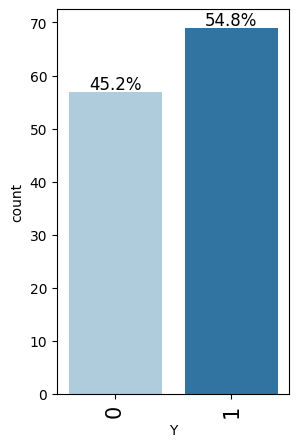

In [17]:
labeled_barplot(data, 'Y', perc=True)

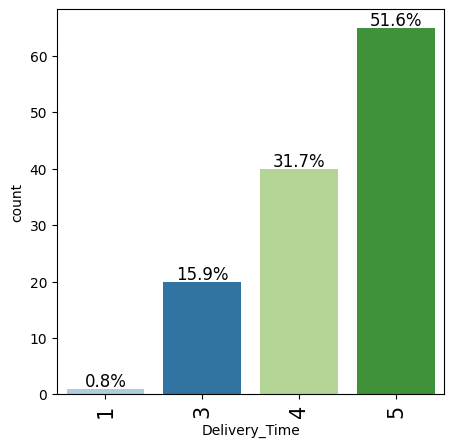

In [18]:
labeled_barplot(data, 'Delivery_Time', perc=True)

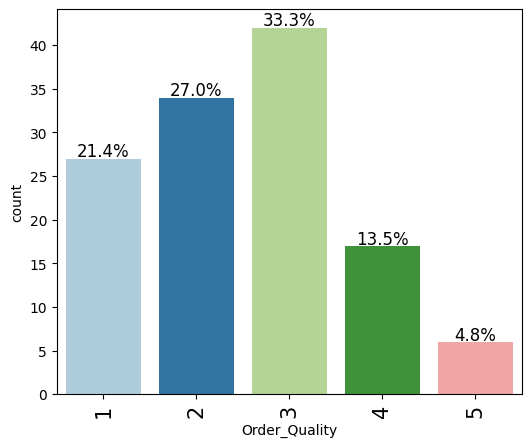

In [19]:
labeled_barplot(data, 'Order_Quality', perc=True)

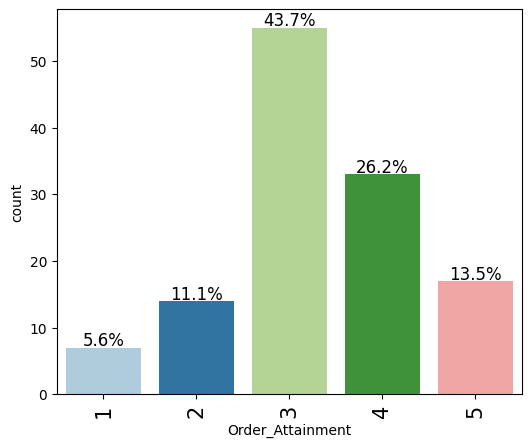

In [20]:
labeled_barplot(data, 'Order_Attainment', perc=True)

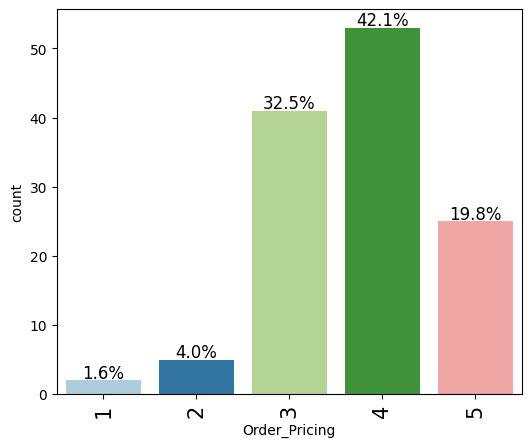

In [21]:
labeled_barplot(data, 'Order_Pricing', perc=True)

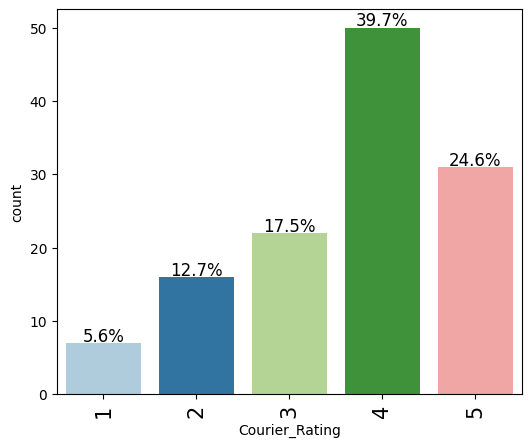

In [22]:
labeled_barplot(data, 'Courier_Rating', perc=True)

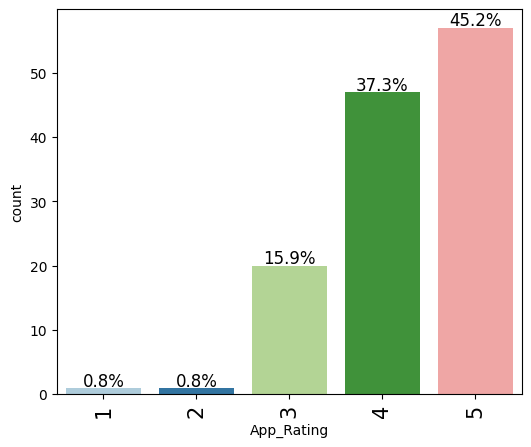

In [23]:
labeled_barplot(data, 'App_Rating', perc=True)

In [24]:
# function to plot barplot wrt target
def stacked_barplot(data, predictor, target):
    '''
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    '''
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc='lower left', frameon=False,
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

Y               0   1  All
Delivery_Time             
All            57  69  126
4              24  16   40
5              20  45   65
3              12   8   20
1               1   0    1
------------------------------------------------------------------------------------------------------------------------


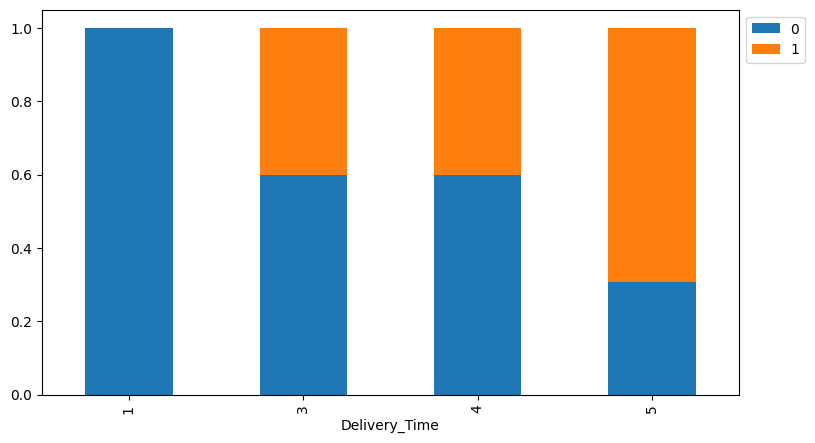

In [25]:
stacked_barplot(data, 'Delivery_Time', 'Y')

Y               0   1  All
Order_Quality             
All            57  69  126
3              19  23   42
1              13  14   27
2              13  21   34
4              10   7   17
5               2   4    6
------------------------------------------------------------------------------------------------------------------------


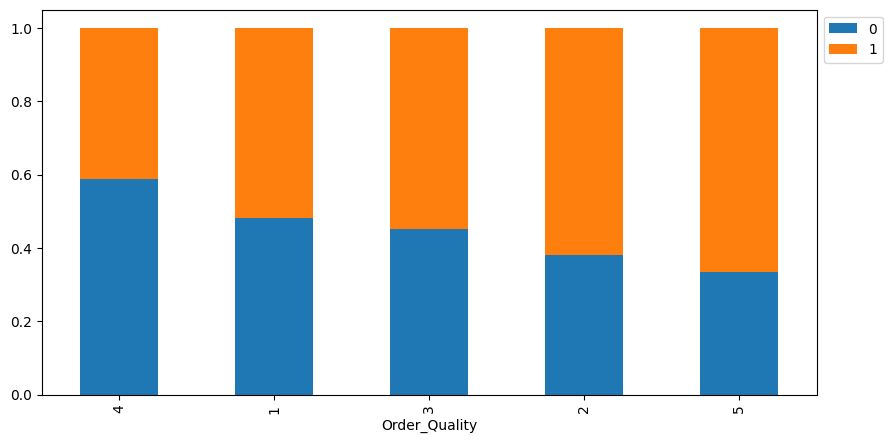

In [26]:
stacked_barplot(data, 'Order_Quality', 'Y')

Y                  0   1  All
Order_Attainment             
All               57  69  126
3                 29  26   55
4                 11  22   33
2                  7   7   14
5                  6  11   17
1                  4   3    7
------------------------------------------------------------------------------------------------------------------------


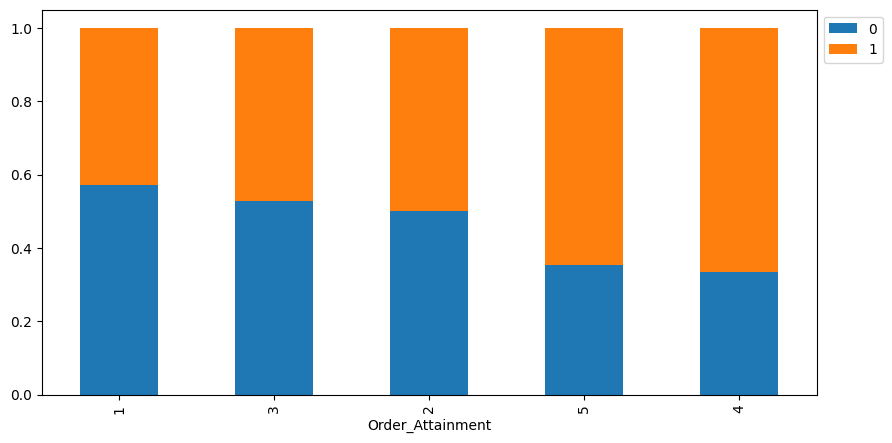

In [27]:
stacked_barplot(data, 'Order_Attainment', 'Y')

Y               0   1  All
Order_Pricing             
All            57  69  126
4              23  30   53
3              20  21   41
5              10  15   25
2               4   1    5
1               0   2    2
------------------------------------------------------------------------------------------------------------------------


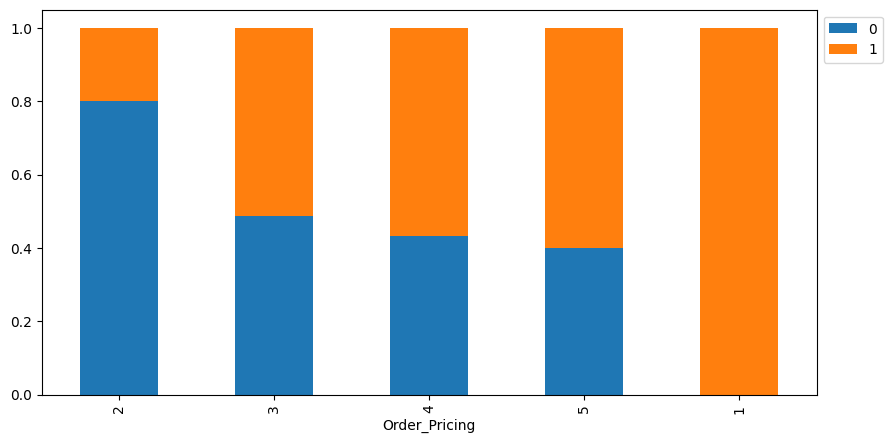

In [28]:
stacked_barplot(data, 'Order_Pricing', 'Y')

Y                0   1  All
Courier_Rating             
All             57  69  126
4               22  28   50
3               12  10   22
2                9   7   16
5                9  22   31
1                5   2    7
------------------------------------------------------------------------------------------------------------------------


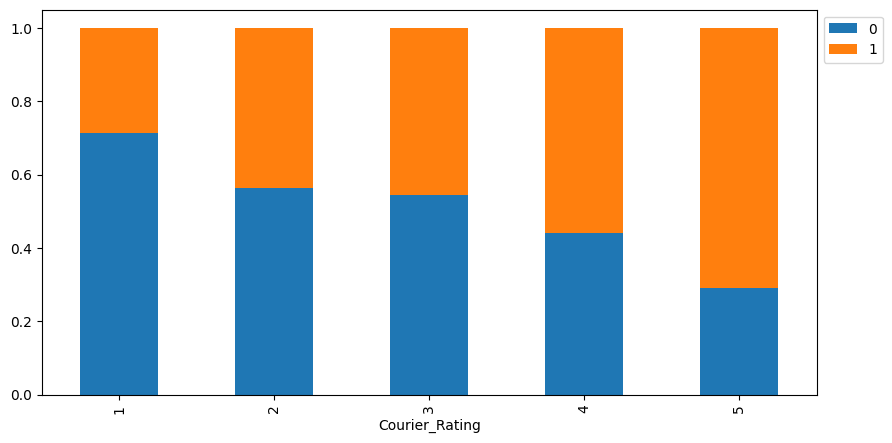

In [29]:
stacked_barplot(data, 'Courier_Rating', 'Y')

Y            0   1  All
App_Rating             
All         57  69  126
5           22  35   57
4           20  27   47
3           14   6   20
2            1   0    1
1            0   1    1
------------------------------------------------------------------------------------------------------------------------


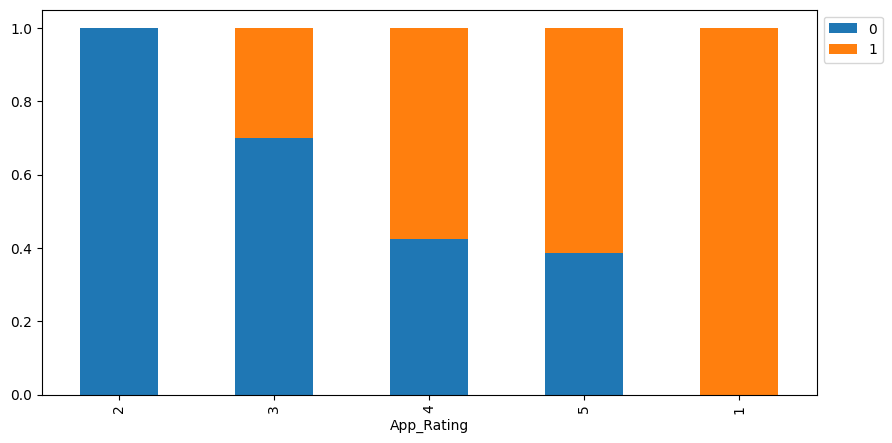

In [30]:
stacked_barplot(data, 'App_Rating', 'Y')

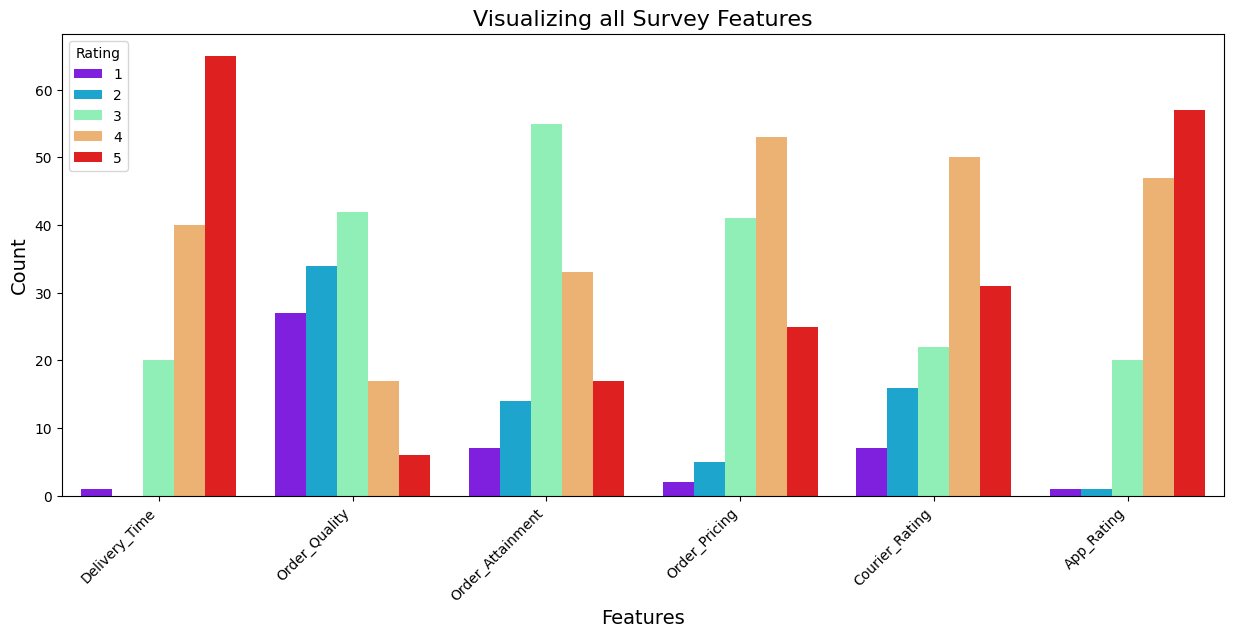

In [31]:
# a comparison for the different features

features = ['Delivery_Time', 'Order_Quality', 'Order_Attainment', 'Order_Pricing', 'Courier_Rating', 'App_Rating']

# Melt the dataframe to long format
data_long = pd.melt(data, value_vars=features, var_name='variable', value_name='value')

plt.figure(figsize=(15, 6))
ax = sns.countplot(data=data_long, x='variable', hue='value', palette='rainbow')

# Customize the plot
plt.xlabel('Features', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualizing all Survey Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')

plt.show()


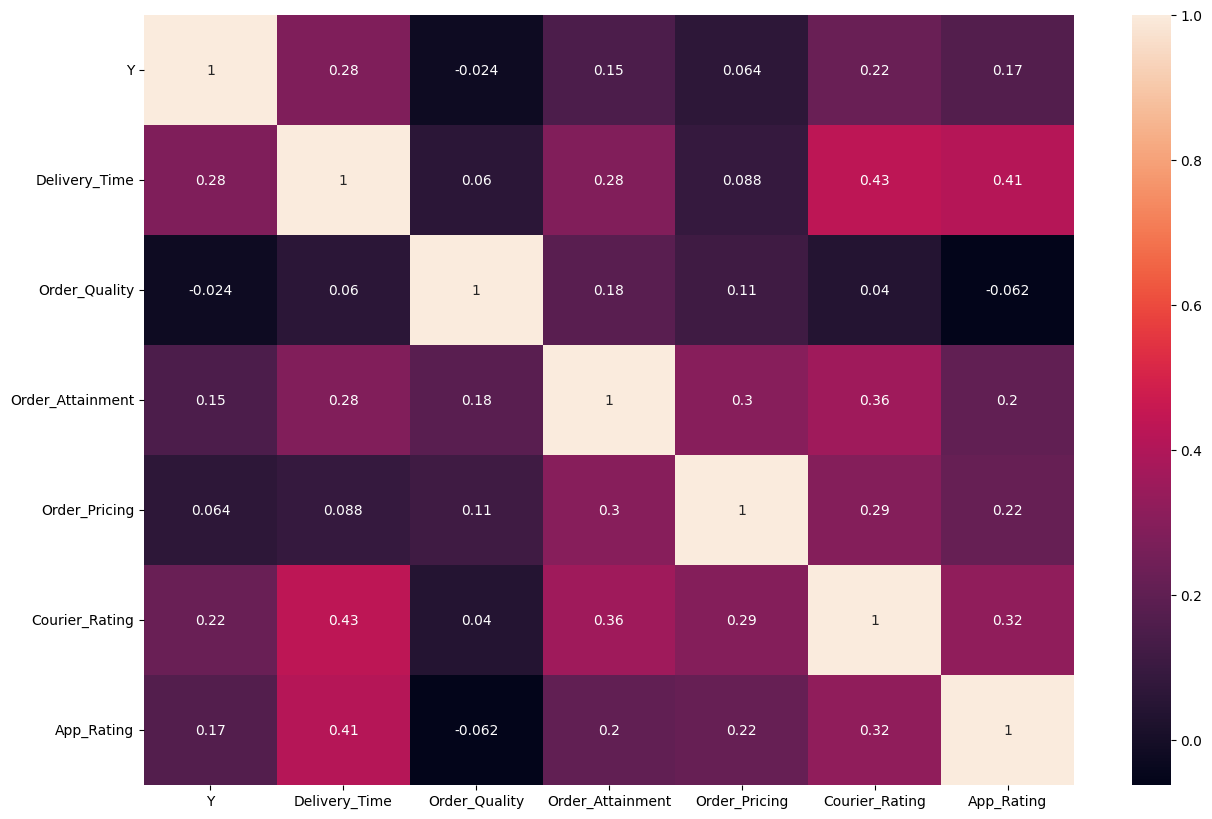

In [32]:
# Heatmap to show how variables are correlated
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()


Observations
- 54.8% of the customers surveyed were happy, while 45.2% of them were unhappy. The margin between happy and unhappy is very small :(
- Generally, X1 (my order was delivered on time), and X6 (the app makes ordering easy for me) are rated high.
- X2 (contents of my order was as I expected) scores the lowest with the lowest 25th and 75th percentile.
- X3 (I ordered everything I wanted to order) scores 3/5 most of the times
- Generally, correlation between all attributes is low generally. Week as it may be, the correlation between our target attribute Y and x2 (which we renamed order quality) is negative.


### Outlier Detection

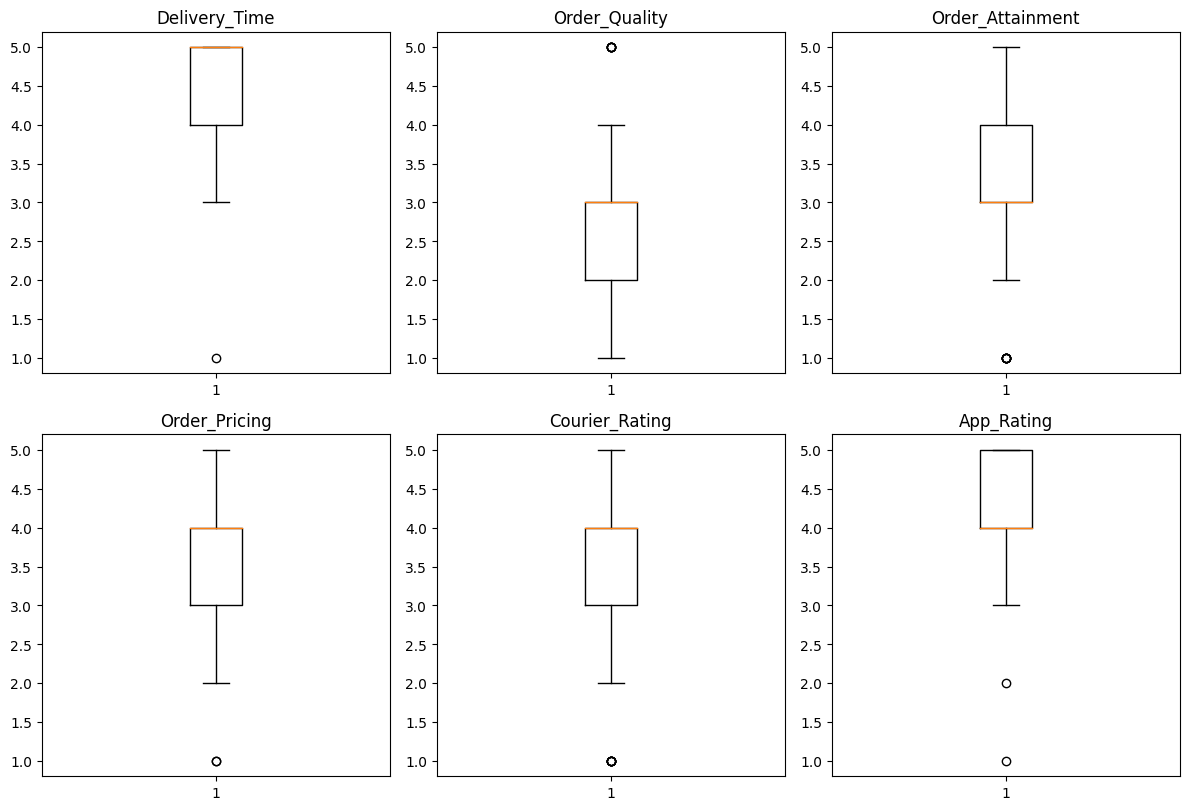

In [33]:
#outlier detection using boxplot
Attributes = ['Delivery_Time', 'Order_Quality', 'Order_Attainment', 'Order_Pricing', 'Courier_Rating', 'App_Rating']
numerical_col = data[Attributes]
plt.figure(figsize=(12, 12))

for i, variable in enumerate(numerical_col):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We observe a few outliers, but we know these are real values requiring no further action.

## Data Preparation and Prepation of Initial Models

In [34]:
# create X(independent variable) and y(dependent variable)
X = data.drop('Y', axis=1)
y = data['Y']

In [35]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5,random_state =5365)

# generate and fit data
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values('Accuracy', ascending=False)
print(models)

100%|██████████| 29/29 [00:02<00:00, 12.05it/s]

[LightGBM] [Info] Number of positive: 38, number of negative: 25
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.603175 -> initscore=0.418710
[LightGBM] [Info] Start training from score 0.418710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

## Identify Top 3 Models

In [36]:
predictions.head(3)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.70,0.70,0.70,0.70,0.11
NearestCentroid,0.63,0.63,0.63,0.63,0.02
BernoulliNB,0.60,0.61,0.61,0.59,0.06


## Hyperparameter Tuning of the Top Models

In [37]:
# instantiate top 3 models
bagging_clf = BaggingClassifier()
nearest_cent = NearestCentroid()
bernoulli_nb = BernoulliNB()

# plot the parameters where grid search might try to find best match
parameters_bagging_clf = {'n_estimators': [30, 50, 70, 90],
                          'max_samples': [0.8, 0.9, 1],
                          'max_features': [0.5, 0.7, 0.9]}

parameters_nearest_cent = {'metric': ['euclidean', 'manhattan'],
                           'shrink_threshold': [None, 0.5, 1.0]}

parameters_bernoulli_nb = {'alpha': [0.5, 1.0, 1.5, 2.0],
                           'binarize': [0.0, 0.5, 1.0]}

# set the grid search for each model
grid_search_bagging_clf = GridSearchCV(bagging_clf, parameters_bagging_clf, cv=5)
grid_search_nearest_cent = GridSearchCV(nearest_cent, parameters_nearest_cent, cv=5)
grid_search_bernoulli_nb = GridSearchCV(bernoulli_nb, parameters_bernoulli_nb, cv=5)



In [38]:
# fit the parameters into the test data
print('Running Grid Search for Bagging Classifier...')
grid_search_bagging_clf.fit(X_train, y_train)
print('Running Grid Search for Nearest Centroid Classifier...')
grid_search_nearest_cent.fit(X_train, y_train)
print('Running Grid Search for Bernoulli Naive Bayes Classifier...')
grid_search_bernoulli_nb.fit(X_train, y_train)

# print the best parameters for each model
best_bagging_clf_params = grid_search_bagging_clf.best_params_
print('Best parameters for Bagging Classifier:', best_bagging_clf_params)
best_nearest_cent_params = grid_search_nearest_cent.best_params_
print('Best parameters for Nearest Centroid Classifier:', best_nearest_cent_params)
best_bernoulli_nb_params = grid_search_bernoulli_nb.best_params_
print('Best parameters for Bernoulli Naive Bayes Classifier:', best_bernoulli_nb_params)

Running Grid Search for Bagging Classifier...
Running Grid Search for Nearest Centroid Classifier...
Running Grid Search for Bernoulli Naive Bayes Classifier...
Best parameters for Bagging Classifier: {'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 50}
Best parameters for Nearest Centroid Classifier: {'metric': 'euclidean', 'shrink_threshold': None}
Best parameters for Bernoulli Naive Bayes Classifier: {'alpha': 2.0, 'binarize': 1.0}


In [39]:
# running the best parameters for the model
bagging_clf = BaggingClassifier(**best_bagging_clf_params)
bagging_clf.fit(X_train, y_train)


BaggingClassifier(max_features=0.5, max_samples=0.9, n_estimators=50)

In [40]:
# running the best parameters for the model
nearest_cent = NearestCentroid(**best_nearest_cent_params)
nearest_cent.fit(X_train, y_train)


NearestCentroid()

In [41]:
# running the best parameters for the model
bernoulli_nb = BernoulliNB(**best_bernoulli_nb_params)
bernoulli_nb.fit(X_train, y_train)

BernoulliNB(alpha=2.0, binarize=1.0)

# Basis for Model Evaluation

- The key goal is to identify unhappy customers to take corrective actions
- The model can make wrong predictions as:

  - False Positives: Predicting a customer is unhappy when they are happy might lead to unnecessary interventions to rectify a problem that is not there, not as demning.
  - False Negatives: Predicting a customer is happy when they are unhappy means missing a chance to fix their issue, this is demning to the business.

- Based on the business need to identify unhappy customers and the mild class imbalance in the data, **Recall** for the unhappy class (Y=0) is the best scorer. It ensures the model captures as many unhappy customers as possible, which is critical for improving customer satisfaction and preventing loss of revenue. However, to avoid excessive false positives (e.g., flagging too many happy customers as unhappy), we could use the **F1-score** for the unhappy class as a secondary metric to maintain a balance with precision.

- Problem with **Accuracy**: While the mild imbalance (43% vs. 57%) makes it somewhat reliable, it does not prioritize unhappy customers specifically and could mask poor performance on the minority class. **Precision** could be useful if interventions are very expensive, but it neglects false negatives, which are more critical here.

**Interprating the confusion matrix**

- True Positives (TP): customer is happy, the model predicted customer is happy (observed=1, predicted=1).
- True Negatives (TN): customer is unhappy, the model predicted unhappy customer (observed=0, predicted=0).
- False Positives (FP): Predicting customer is unhappy when the are happy (observed=1, predicted=0).
- False Negatives (FN): The model predicted customer is happy, customer is unhappy (observed=0, predicted=1).

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    '''
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'Accuracy': acc,
            'Recall': recall,
            'Precision': precision,
            'F1': f1,
        },
        index=[0],
    )

    return df_perf

In [43]:
# a function to plot the confusion matrices
def confusion_matrix_sklearn(model, predictors, target):
    '''
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Evaluating the Tuned Models

Training Performance:
    Accuracy  Recall  Precision   F1
0      0.87    1.00       0.83 0.90
Testing Performance:
    Accuracy  Recall  Precision   F1
0      0.65    0.77       0.62 0.69


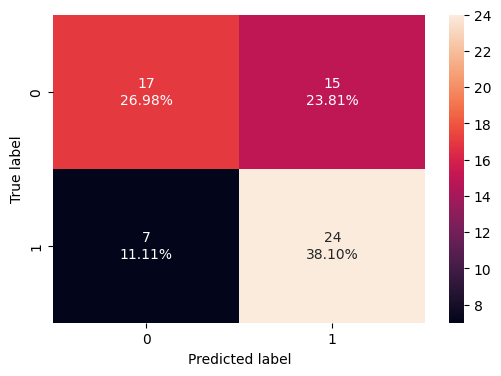

In [44]:
#calculating different metrics for the model
bagging_clf_model_train_perf = model_performance_classification_sklearn(
    bagging_clf, X_train, y_train
)
print('Training Performance:\n', bagging_clf_model_train_perf)
bagging_clf_model_test_perf = model_performance_classification_sklearn(
    bagging_clf, X_test, y_test
)
print('Testing Performance:\n', bagging_clf_model_test_perf)

# creating test confusion matrix
confusion_matrix_sklearn(bagging_clf, X_test, y_test)

Training Performance:
    Accuracy  Recall  Precision   F1
0      0.52    0.55       0.62 0.58
Testing Performance:
    Accuracy  Recall  Precision   F1
0      0.63    0.61       0.63 0.62


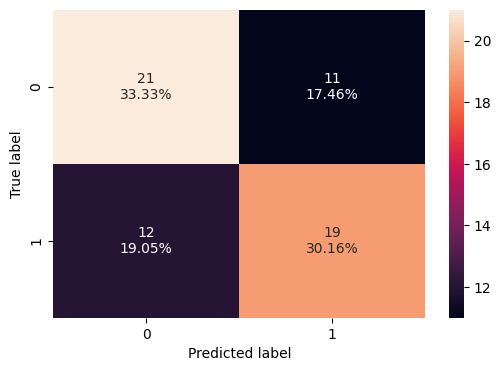

In [45]:
#calculating different metrics for the model
nearest_cent_model_train_perf = model_performance_classification_sklearn(
    nearest_cent, X_train, y_train
)
print('Training Performance:\n', nearest_cent_model_train_perf)
nearest_cent_model_test_perf = model_performance_classification_sklearn(
    nearest_cent, X_test, y_test
)
print('Testing Performance:\n', nearest_cent_model_test_perf)

# creating test confusion matrix
confusion_matrix_sklearn(nearest_cent, X_test, y_test)

Training Performance:
    Accuracy  Recall  Precision   F1
0      0.65    1.00       0.63 0.78
Testing Performance:
    Accuracy  Recall  Precision   F1
0      0.51    0.94       0.50 0.65


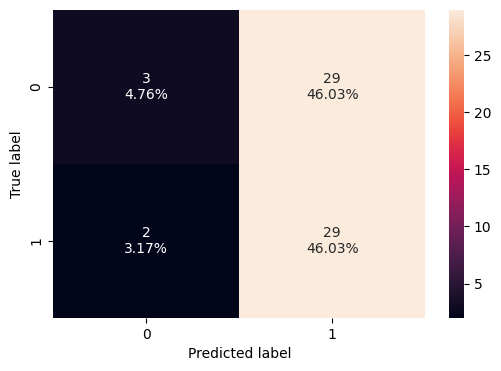

In [46]:
#calculating different metrics for the model
bernoulli_nb_model_train_perf = model_performance_classification_sklearn(
    bernoulli_nb, X_train, y_train
)
print('Training Performance:\n', bernoulli_nb_model_train_perf)
bernoulli_nb_model_test_perf = model_performance_classification_sklearn(
    bernoulli_nb, X_test, y_test
)
print('Testing Performance:\n', bernoulli_nb_model_test_perf)

# creating test confusion matrix
confusion_matrix_sklearn(bernoulli_nb, X_test, y_test)


## Stacking Classifier
- Building a stacking model with the tuned models

In [47]:
# Building stacking classifier using the top 3 models
estimators = [
    ('bagging_clf', bagging_clf),
    ('nearest_cent', nearest_cent),
    ('bernoulli_nb', bernoulli_nb),
]
final_estimator = bagging_clf

stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('bagging_clf',
                                BaggingClassifier(max_features=0.5,
                                                  max_samples=0.9,
                                                  n_estimators=50)),
                               ('nearest_cent', NearestCentroid()),
                               ('bernoulli_nb',
                                BernoulliNB(alpha=2.0, binarize=1.0))],
                   final_estimator=BaggingClassifier(max_features=0.5,
                                                     max_samples=0.9,
                                                     n_estimators=50))

Training Performance:
    Accuracy  Recall  Precision   F1
0      0.60    0.74       0.65 0.69
Testing Performance:
    Accuracy  Recall  Precision   F1
0      0.51    0.74       0.50 0.60


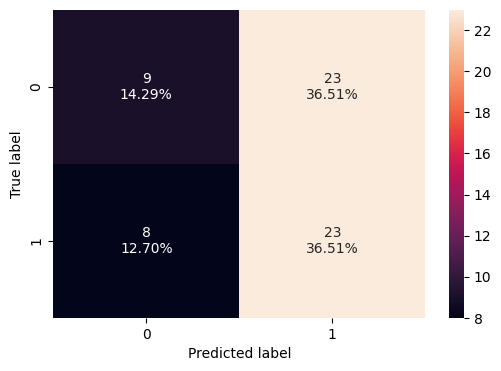

In [48]:
# calculating the different metrics
stacking_clf_model_train_perf = model_performance_classification_sklearn(
    stacking_clf, X_train, y_train
)
print('Training Performance:\n', stacking_clf_model_train_perf)
stacking_clf_model_test_perf = model_performance_classification_sklearn(
    stacking_clf, X_test, y_test
)
print('Testing Performance:\n', stacking_clf_model_test_perf)

# creating test confusion matrix
confusion_matrix_sklearn(stacking_clf, X_test, y_test)

## Model Performance Comparison

In [49]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_clf_model_train_perf.T,
        nearest_cent_model_train_perf.T,
        bernoulli_nb_model_train_perf.T,
        stacking_clf_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    'Bagging Classifier',
    'Nearest Centroid',
    'Bernoulli Naive Bayes',
    'Stacking Classifier',
]

# testing performance comparison
models_test_comp_df = pd.concat(
    [
        bagging_clf_model_test_perf.T,
        nearest_cent_model_test_perf.T,
        bernoulli_nb_model_test_perf.T,
        stacking_clf_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    'Bagging Classifier',
    'Nearest Centroid',
    'Bernoulli Naive Bayes',
    'Stacking Classifier',
]

In [50]:
print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Nearest Centroid,Bernoulli Naive Bayes,Stacking Classifier
Accuracy,0.87,0.52,0.65,0.60
Recall,1.00,0.55,1.00,0.74
Precision,0.83,0.62,0.63,0.65
F1,0.90,0.58,0.78,0.69


In [51]:
print('Testing performance comparison:')
models_test_comp_df

Testing performance comparison:


,Bagging Classifier,Nearest Centroid,Bernoulli Naive Bayes,Stacking Classifier
Accuracy,0.65,0.63,0.51,0.51
Recall,0.77,0.61,0.94,0.74
Precision,0.62,0.63,0.50,0.50
F1,0.69,0.62,0.65,0.60


## Important Features of the Final Model
- The Tuned **BernoulliNB** model is the best model because it has the highest `Recall` (for unhappy class), which is a measure of how many actual unhappy customers are correctly identified. It also has the best `F1-Score` on training performance, which is my preferred secondary metric.
- We will look at the important features of the final model

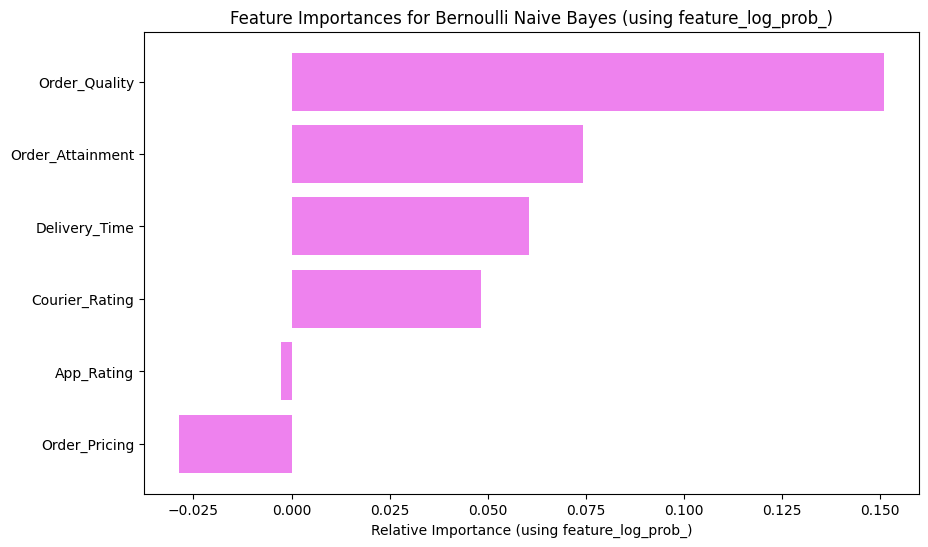

In [52]:
# Feature importance for the final model
feature_names = X_train.columns
# for feature importance, using feature_log_prob_ as proxy
# Assuming binary classification; for multi-class, loop through feature_log_prob_
importances = bernoulli_nb.feature_log_prob_[1] - bernoulli_nb.feature_log_prob_[0]
# Get indices that would sort the importances in ascending order
indices = np.argsort(importances)

# Plot for important features of the final model
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Bernoulli Naive Bayes (using feature_log_prob_)')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance (using feature_log_prob_)')
plt.show()

Observations
- X2 (Order Quality) is the most importent feature in correctly predicting unhappy customers. 3 other features are have relative importance (X3, X1, and X5 respectively). [*where the log probability difference is positive, high scores show the likelihood of a customer being happy.*]
- X4 (Order Price), then X6 are of negative importance. [*where the log probability difference is negative, high scores show the likelihood of a customer being unhappy.*]

### **Overall Insights & Conclusion**
- All models failed to reach the desired 73% on `accuracy`, the initial Bagging Classifier model is the only one that come closer at 70%.
- As have been outlined earlier however, `recall` for the unhappy class works best as the primary metric for our data, with `F1-score` as the secondary consideration as it aslo balances `precision`.
Maximising on `recall` ensures the model captures as many unhappy customers as possible, which is critical for improving customer satisfaction. The Tuned **Bernoulli Naive Bayes** gave us the best model with a `recall` of 94%
- From our EDA, we see the need to improve the `Order_Qaulity` (X2) and `Order_Attainment` (X3) as these are being rated average to below average mostly.
- From the Feature Importance analysis;
 - X2 (Order Quality) is the most importent feature in correctly predicting unhappy customers. 3 other features are have relative importance (X3, X1, and X5 respectively). [where the log probability difference is positive, high scores show the likelihood of a customer being happy.]
 - X4 (Order Price), then X6 are of negative importance. [where the log probability difference is negative, high scores show the likelihood of a customer being unhappy.]
- Other factors like demograghics could have an impact on the prediction of unhappy customers. It might be beneficial to gather such details.
